In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
# Simulates a single roll with a given set of outcomes and probabilities
def simulateRoll(outcomes, probabilities, samples=1):
    result = random.choices(outcomes, weights=probabilities, k=samples)
    
    return result[0] if samples == 1 else result

# Adds the result of each roll to an array and returns the array
def simulateGame(numRolls, outcomes, probabilities):
    results = simulateRoll(outcomes, probabilities, numRolls)
    return results

# Plot the averages as the game progresses
def plotAverages(results):
    averages = []
    for i in range(len(results)):
        averages.append(np.mean(results[:i+1]))
    plt.plot(averages)
    plt.show()

# Machine 1
**Probability of getting $10:** 40%

**Probability of getting $0:** 60%

Average:  4.122


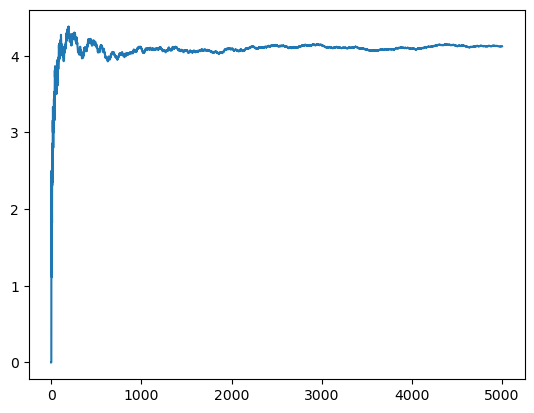

In [3]:
# Run the simulation and plot the averages
games = 5000
outcomes = [10, 0]
probabilities = [0.4, 0.6]

results = simulateGame(games, outcomes, probabilities)
print("Average: ", np.mean(results))

plotAverages(results)

# Machine 2
**Probability of getting $100:** 3%

**Probability of getting $0:** 93%

Average:  2.83


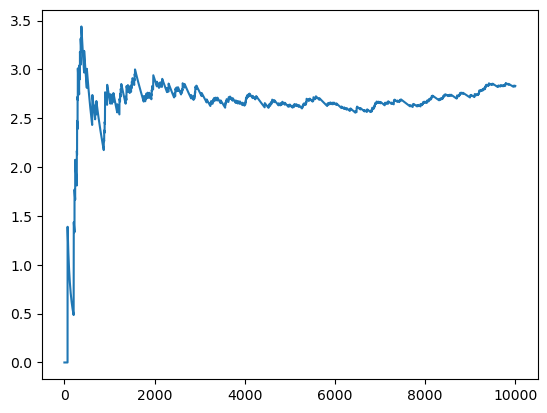

In [4]:
# Run the simulation and plot the averages
games = 10000
outcomes = [100, 0]
probabilities = [0.03, 0.97]

results = simulateGame(games, outcomes, probabilities)
print("Average: ", np.mean(results))

plotAverages(results)

## Calculating the expected value as we go

We want to update our expected value as we start getting results, not after a lot of tries

Since we don't know where where it should converge, we should notice when it stops "oscilating". We could look at the parts where the previous delta moves "a little".

In [5]:
# Calculate the expected value of the game
def calculateExpectedValue(currentIteration, previousExpectedValue, learningRate=0):
    if learningRate == 0:
        learningRate = 1/currentIteration

    expectedValue = previousExpectedValue + learningRate*(simulateRoll(outcomes, probabilities) - previousExpectedValue)

    return expectedValue

# Simulate the game and calculate the expected value
def simulateGameWithExpectedValue(outcomes, probabilities, learningRate=0):
    expectedValue = simulateRoll(outcomes, probabilities) # Our first expected value

    currentIteration = 1
    error = 1 # Just to enter the while loop
    initialIterations = 500 # This prevents the initial convergence from stopping from consecutive values
    expectedValueArray = []

    if learningRate == 0:
        for i in range(initialIterations):
            expectedValue = calculateExpectedValue(currentIteration, expectedValue)
            expectedValueArray.append(expectedValue)
            currentIteration += 1

        while abs(error) >= 0.001:
            currentIteration += 1
            previousExpectedValue = expectedValue
            expectedValue = calculateExpectedValue(currentIteration, expectedValue)
            expectedValueArray.append(expectedValue)
            error = abs(expectedValue - previousExpectedValue)

        print("\nConvergence iteration: ", currentIteration)
        print("Error: ", error)
    
    else:
        for i in range(initialIterations):
            expectedValue = calculateExpectedValue(learningRate, expectedValue, learningRate)
            expectedValueArray.append(expectedValue)
            currentIteration += 1

        while currentIteration < 1000000 and error >= 0.001:
            currentIteration += 1
            previousExpectedValue = expectedValue
            expectedValue = calculateExpectedValue(learningRate, expectedValue, learningRate)
            expectedValueArray.append(expectedValue)
            error = abs(expectedValue - previousExpectedValue)

        print("\nConvergence iteration with learning rate ", learningRate, ": ", currentIteration)
        print("Error: ", error)


    return expectedValue, expectedValueArray


# Machine 1
**Probability of getting $10:** 40%

**Probability of getting $0:** 60%


Convergence iteration:  3960
Error:  0.0009997703736019936
Expected Value:  3.958090909090914

Convergence iteration with learning rate  0.1 :  1000000
Error:  0.4439950959695418
Expected Value with learning rate  0.1 :  3.9959558637258734

Convergence iteration with learning rate  0.01 :  1000000
Error:  0.04085044583334607
Expected Value with learning rate  0.01 :  4.044194137501295

Convergence iteration with learning rate  0.001 :  1000000
Error:  0.006217445755349882
Expected Value with learning rate  0.001 :  3.788771690405288

Convergence iteration with learning rate  0.002 :  1000000
Error:  0.008305090268964754
Expected Value with learning rate  0.002 :  4.144240044213344

Convergence iteration with learning rate  0.005 :  1000000
Error:  0.030450160793957792
Expected Value with learning rate  0.005 :  3.940418002002431

Convergence iteration with learning rate  0.007 :  1000000
Error:  0.02508984352940402
Expected Value with learning rate  0.007 :  3.5591735178140396

Conver

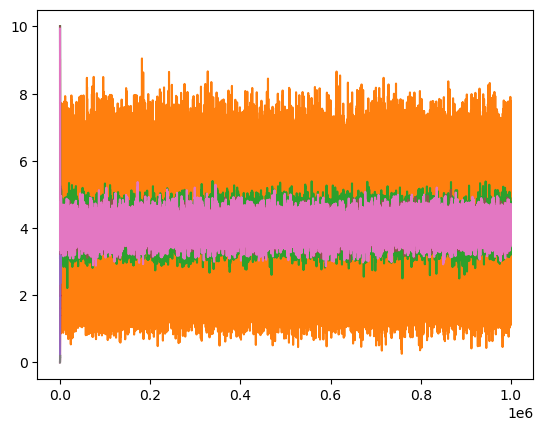

In [6]:
# Run the simulation and print the expected value
outcomes = [10, 0]
probabilities = [0.4, 0.6]
expectedValueArrays = []
tempArray = []

expectedValue, tempArray = simulateGameWithExpectedValue(outcomes, probabilities)
expectedValueArrays.append(tempArray)
print("Expected Value: ", expectedValue)

# Run the simulation with a fixed learning rate of 0.1, 0.01 and 0.001
for learningRate in [0.1, 0.01, 0.001, 0.002, 0.005, 0.007, 0.0001]:
    expectedValue, tempArray = simulateGameWithExpectedValue(outcomes, probabilities, learningRate)
    expectedValueArrays.append(tempArray)
    print("Expected Value with learning rate ", learningRate, ": ", expectedValue)

# Plot the expected values
for i in range(len(expectedValueArrays)):
    plt.plot(expectedValueArrays[i])

# Machine 2
**Probability of getting $100:** 3%

**Probability of getting $0:** 93%


Convergence iteration:  3018
Error:  0.000999834601934424
Expected Value:  3.0165009940357845

Convergence iteration with learning rate  0.1 :  749
Error:  0.0009604945297333415
Expected Value with learning rate  0.1 :  0.008644450767600079

Convergence iteration with learning rate  0.01 :  551644
Error:  0.0009969818191763319
Expected Value with learning rate  0.01 :  0.09870120009845645

Convergence iteration with learning rate  0.001 :  1000000
Error:  0.002560879951496009
Expected Value with learning rate  0.001 :  2.5583190715445094

Convergence iteration with learning rate  0.002 :  1000000
Error:  0.005955799290263908
Expected Value with learning rate  0.002 :  2.971943845841643

Convergence iteration with learning rate  0.005 :  1000000
Error:  0.018407251655814694
Expected Value with learning rate  0.005 :  3.6630430795071036

Convergence iteration with learning rate  0.007 :  1000000
Error:  0.03212119401178981
Expected Value with learning rate  0.007 :  4.556620807672469

C

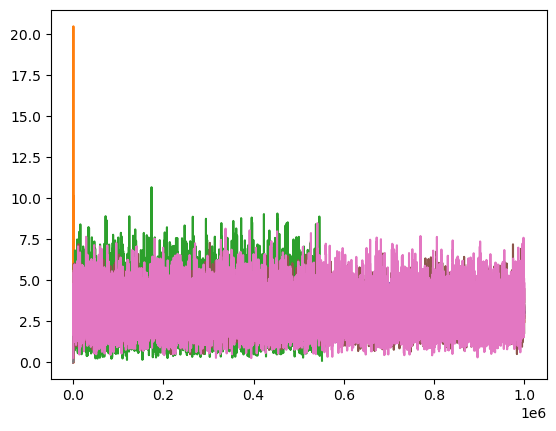

In [7]:
# Run the simulation and print the expected value
outcomes = [100, 0]
probabilities = [0.03, 0.97]
expectedValueArrays = []
tempArray = []

expectedValue, tempArray = simulateGameWithExpectedValue(outcomes, probabilities)
expectedValueArrays.append(tempArray)
print("Expected Value: ", expectedValue)

# Run the simulation with a fixed learning rate of 0.1, 0.01 and 0.001
for learningRate in [0.1, 0.01, 0.001, 0.002, 0.005, 0.007, 0.0001]:
    expectedValue, tempArray = simulateGameWithExpectedValue(outcomes, probabilities, learningRate)
    expectedValueArrays.append(tempArray)
    print("Expected Value with learning rate ", learningRate, ": ", expectedValue)

# Plot the expected values
for i in range(len(expectedValueArrays)):
    plt.plot(expectedValueArrays[i])